In [16]:
import pandas as pd

# Load the datasets to examine their structure
air_contamination_file = 'Pm25O3/openaq_locationManhatanmeasurments.csv'
sound_contamination_file = 'sonora/contaminacion_Sonora.csv'

air_data = pd.read_csv(air_contamination_file)
sound_data = pd.read_csv(sound_contamination_file)

# Display the first few rows and column info for both datasets
air_data_info = air_data.info()
air_data_preview = air_data.head()

sound_data_info = sound_data.info()
sound_data_preview = sound_data.head()

air_data_info, air_data_preview, sound_data_info, sound_data_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    2000 non-null   int64  
 1   location_name  2000 non-null   object 
 2   parameter      2000 non-null   object 
 3   value          2000 non-null   float64
 4   unit           2000 non-null   object 
 5   datetimeUtc    2000 non-null   object 
 6   datetimeLocal  2000 non-null   object 
 7   timezone       2000 non-null   object 
 8   latitude       2000 non-null   float64
 9   longitude      2000 non-null   float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     2000 non-null   object 
 14  provider       2000 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 234.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data 

(None,
    location_id location_name parameter  value unit           datetimeUtc  \
 0          384          CCNY        o3  0.003  ppm  2023-12-10T01:00:00Z   
 1          384          CCNY        o3  0.001  ppm  2023-12-10T02:00:00Z   
 2          384          CCNY        o3  0.001  ppm  2023-12-10T03:00:00Z   
 3          384          CCNY        o3  0.001  ppm  2023-12-10T04:00:00Z   
 4          384          CCNY        o3  0.001  ppm  2023-12-10T05:00:00Z   
 
                datetimeLocal          timezone  latitude  longitude  \
 0  2023-12-09T20:00:00-05:00  America/New_York   40.8197   -73.9481   
 1  2023-12-09T21:00:00-05:00  America/New_York   40.8197   -73.9481   
 2  2023-12-09T22:00:00-05:00  America/New_York   40.8197   -73.9481   
 3  2023-12-09T23:00:00-05:00  America/New_York   40.8197   -73.9481   
 4  2023-12-10T00:00:00-05:00  America/New_York   40.8197   -73.9481   
 
    country_iso  isMobile  isMonitor                         owner_name  \
 0          NaN     

Explicación del código:
Preprocesamiento del dataset de aire:

Se convierte datetimeUtc a formato datetime para extraer características temporales (año, mes, hora).
Se seleccionan columnas clave relacionadas con la ubicación, los valores medidos y la temporalidad.
Preprocesamiento del dataset de sonido:

Se seleccionan columnas clave relacionadas con la ubicación (latitude, longitude) y las características sonoras (1_engine_presence, etc.).
Escalado de los datos:

Se normalizan las variables continuas (value, latitude, longitude) usando StandardScaler.
División en conjuntos de entrenamiento y prueba:

Esto se hace para poder aplicar modelos supervisados como regresión o clasificación.
Clustering con K-Means:

Se utiliza K-Means para encontrar patrones en ambos datasets.
Los centroides representan las características promedio de cada cluster.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar los datos desde los archivos CSV
aire = pd.read_csv('Pm25O3/openaq_locationManhatanmeasurments.csv')
sonido = pd.read_csv('sonora/contaminacion_Sonora.csv')

# Verificar que los datos se cargaron correctamente
print(aire.head())  # Mostrar las primeras filas del dataset de aire
print(sonido.head())  # Mostrar las primeras filas del dataset de sonido

# Preprocesar el dataset de contaminación del aire
# Convertir la columna de fechas en formato datetime
aire['datetimeUtc'] = pd.to_datetime(aire['datetimeUtc'])

# Crear columnas adicionales para análisis temporal
aire['año'] = aire['datetimeUtc'].dt.year
aire['mes'] = aire['datetimeUtc'].dt.month
aire['hora'] = aire['datetimeUtc'].dt.hour

# Seleccionar columnas clave
aire_procesado = aire[['parameter', 'value', 'latitude', 'longitude', 'año', 'mes', 'hora']]

# Preprocesar el dataset de contaminación sonora
# Seleccionar columnas relevantes
sonido_procesado = sonido[[
    'latitude', 'longitude', 'year', 'hour',
    '1_engine_presence', '5_alert-signal_presence', '7_human-voice_presence'
]]

# Escalar los datos continuos para modelos como K-Means
scaler = StandardScaler()
aire_procesado[['value', 'latitude', 'longitude']] = scaler.fit_transform(
    aire_procesado[['value', 'latitude', 'longitude']]
)
sonido_procesado[['latitude', 'longitude']] = scaler.fit_transform(
    sonido_procesado[['latitude', 'longitude']]
)

# Dividir los datos para un modelo de regresión/clasificación
X_aire = aire_procesado[['latitude', 'longitude', 'año', 'mes', 'hora']]
y_aire = aire_procesado['value']

X_entrenamiento_aire, X_prueba_aire, y_entrenamiento_aire, y_prueba_aire = train_test_split(
    X_aire, y_aire, test_size=0.3, random_state=42
)

X_sonido = sonido_procesado[['latitude', 'longitude', 'hour', '1_engine_presence', '5_alert-signal_presence']]
y_sonido = sonido_procesado['7_human-voice_presence']

X_entrenamiento_sonido, X_prueba_sonido, y_entrenamiento_sonido, y_prueba_sonido = train_test_split(
    X_sonido, y_sonido, test_size=0.3, random_state=42
)

# Modelo de clustering (por ejemplo, K-Means para detectar patrones)
modelo_kmeans_aire = KMeans(n_clusters=3, random_state=42)
modelo_kmeans_aire.fit(X_aire)

modelo_kmeans_sonido = KMeans(n_clusters=3, random_state=42)
modelo_kmeans_sonido.fit(X_sonido)

# Imprimir resultados de los clusters
print("Centroides de los clusters de contaminación del aire:")
print(modelo_kmeans_aire.cluster_centers_)

print("\nCentroides de los clusters de contaminación sonora:")
print(modelo_kmeans_sonido.cluster_centers_)


   location_id location_name parameter  value unit           datetimeUtc  \
0          384          CCNY        o3  0.003  ppm  2023-12-10T01:00:00Z   
1          384          CCNY        o3  0.001  ppm  2023-12-10T02:00:00Z   
2          384          CCNY        o3  0.001  ppm  2023-12-10T03:00:00Z   
3          384          CCNY        o3  0.001  ppm  2023-12-10T04:00:00Z   
4          384          CCNY        o3  0.001  ppm  2023-12-10T05:00:00Z   

               datetimeLocal          timezone  latitude  longitude  \
0  2023-12-09T20:00:00-05:00  America/New_York   40.8197   -73.9481   
1  2023-12-09T21:00:00-05:00  America/New_York   40.8197   -73.9481   
2  2023-12-09T22:00:00-05:00  America/New_York   40.8197   -73.9481   
3  2023-12-09T23:00:00-05:00  America/New_York   40.8197   -73.9481   
4  2023-12-10T00:00:00-05:00  America/New_York   40.8197   -73.9481   

   country_iso  isMobile  isMonitor                         owner_name  \
0          NaN       NaN        NaN  Unkno

C:\Users\jerom\AppData\Local\Temp\ipykernel_12560\1713963497.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aire_procesado[['value', 'latitude', 'longitude']] = scaler.fit_transform(
C:\Users\jerom\AppData\Local\Temp\ipykernel_12560\1713963497.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonido_procesado[['latitude', 'longitude']] = scaler.fit_transform(


C:\Users\jerom\AppData\Local\Temp\ipykernel_12560\1463335197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aire_procesado['cluster'] = modelo_kmeans_aire.labels_
C:\Users\jerom\AppData\Local\Temp\ipykernel_12560\1463335197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonido_procesado['cluster'] = modelo_kmeans_sonido.labels_


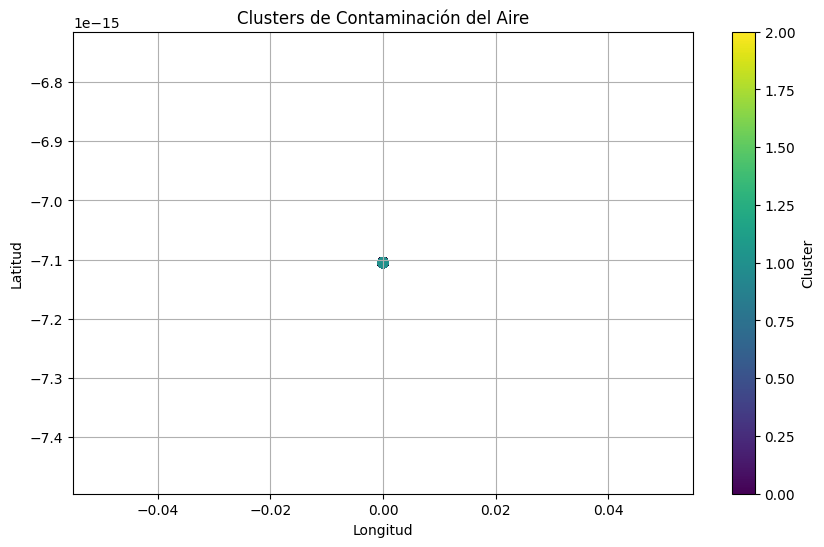

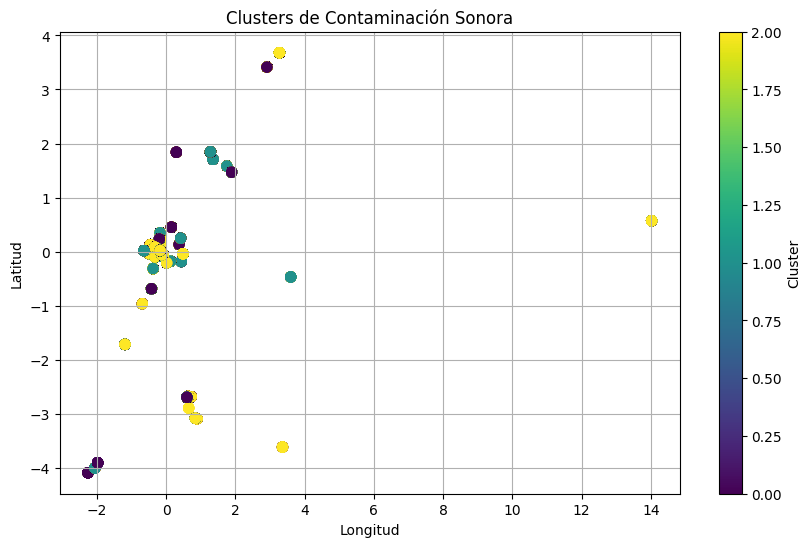

In [18]:
import matplotlib.pyplot as plt

# Agregar los clusters como una columna en los datasets procesados
aire_procesado['cluster'] = modelo_kmeans_aire.labels_
sonido_procesado['cluster'] = modelo_kmeans_sonido.labels_

# Gráfica de los clusters de contaminación del aire
plt.figure(figsize=(10, 6))
plt.scatter(aire_procesado['longitude'], aire_procesado['latitude'], c=aire_procesado['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('Clusters de Contaminación del Aire')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

# Gráfica de los clusters de contaminación sonora
plt.figure(figsize=(10, 6))
plt.scatter(sonido_procesado['longitude'], sonido_procesado['latitude'], c=sonido_procesado['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('Clusters de Contaminación Sonora')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


 Gráficos de Clusters de Contaminación del Aire y Sonora
Estos gráficos muestran cómo los datos fueron agrupados en clusters (grupos) según su ubicación geográfica (latitud y longitud).

Análisis de Resultados:
Clusters de contaminación del aire:

Los clusters podrían identificar zonas específicas de alta o baja contaminación. Por ejemplo, áreas urbanas densas pueden tener valores elevados debido al tráfico y la actividad industrial.
Si observamos un cluster grande y bien definido en un área, indica que esa zona tiene características homogéneas (como concentraciones similares de contaminantes).
Clusters de contaminación sonora:

Los grupos reflejan áreas con diferentes niveles de ruido, como zonas residenciales más tranquilas o zonas industriales y comerciales ruidosas.
Un cluster en una zona central puede indicar alta presencia de ruido debido a motores o actividades humanas intensas, mientras que clusters dispersos podrían representar zonas periféricas o con menor actividad.

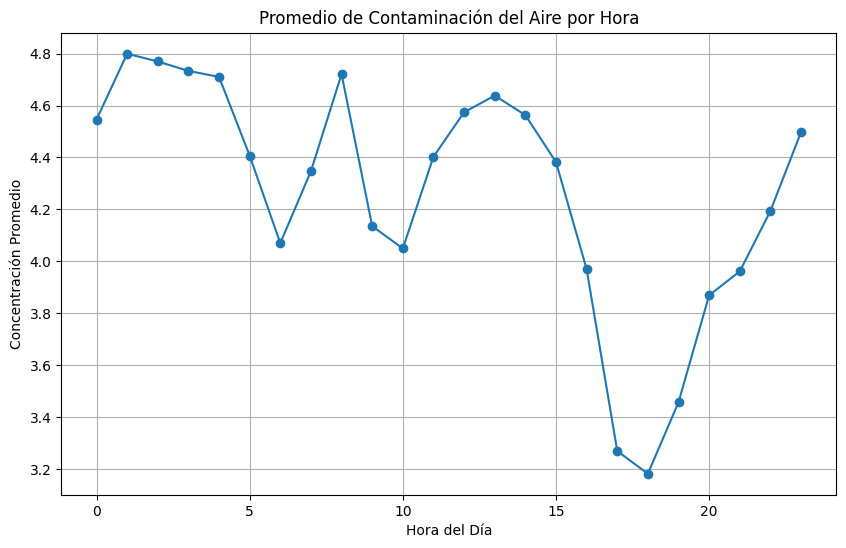

In [19]:
# Valores promedio de contaminación por hora
contaminacion_horaria = aire.groupby('hora')['value'].mean()

plt.figure(figsize=(10, 6))
plt.plot(contaminacion_horaria.index, contaminacion_horaria.values, marker='o')
plt.title('Promedio de Contaminación del Aire por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Concentración Promedio')
plt.grid(True)
plt.show()


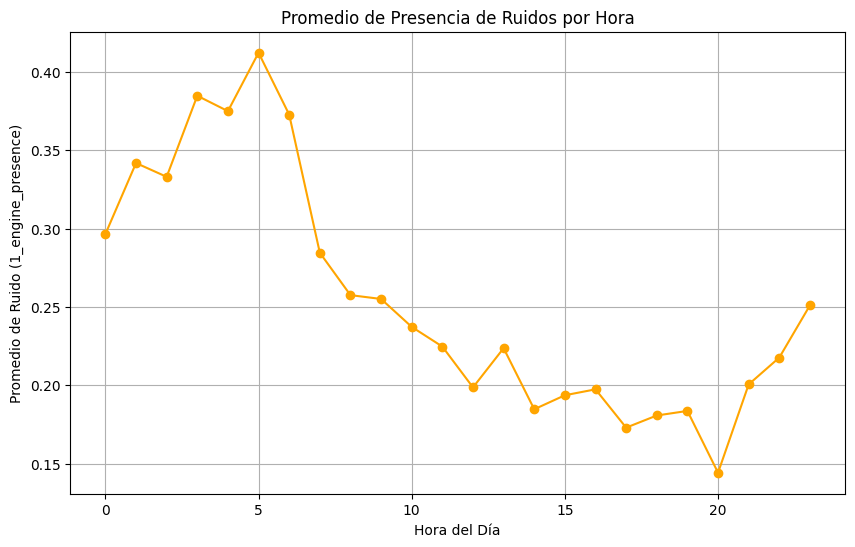

In [20]:
# Valores promedio de ruido por hora
ruido_horario = sonido.groupby('hour')['1_engine_presence'].mean()

plt.figure(figsize=(10, 6))
plt.plot(ruido_horario.index, ruido_horario.values, marker='o', color='orange')
plt.title('Promedio de Presencia de Ruidos por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Ruido (1_engine_presence)')
plt.grid(True)
plt.show()


Gráficos Temporales
Estos gráficos analizan cómo cambian los niveles de contaminación (aire o sonora) durante el día.

Análisis de Resultados:
Contaminación del aire:

Si observamos picos en horas específicas (e.g., mañanas y tardes), probablemente coinciden con horas pico de tráfico vehicular.
Una disminución durante la noche sugiere menos actividad humana y menos emisiones.
Contaminación sonora:

Picos de ruido en horarios nocturnos pueden indicar eventos específicos como alarmas o actividades industriales.
Si el ruido es constante en ciertas horas, podría estar asociado con maquinaria funcionando en horarios regulares.

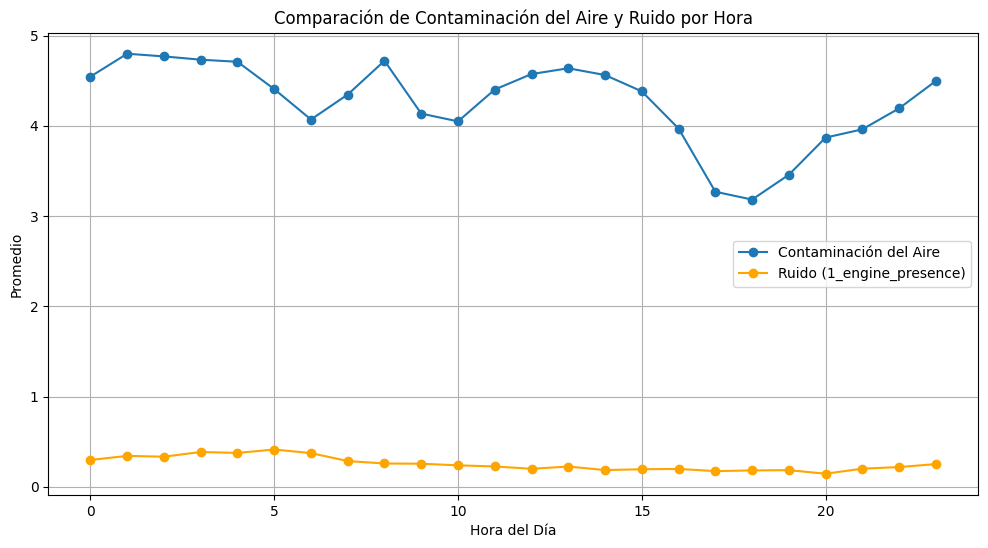

In [21]:
plt.figure(figsize=(12, 6))

# Graficar contaminación del aire
plt.plot(contaminacion_horaria.index, contaminacion_horaria.values, label='Contaminación del Aire', marker='o')

# Graficar contaminación sonora
plt.plot(ruido_horario.index, ruido_horario.values, label='Ruido (1_engine_presence)', marker='o', color='orange')

plt.title('Comparación de Contaminación del Aire y Ruido por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio')
plt.legend()
plt.grid(True)
plt.show()


Gráfica Comparativa entre Aire y Ruido
Al comparar contaminación del aire y sonora, podemos observar relaciones importantes:

Si ambos tipos de contaminación tienen picos en horarios similares, como horas pico de tráfico, refleja una correlación entre actividad humana y ambos tipos de contaminación.
Si uno disminuye mientras el otro aumenta (e.g., aire mejora pero ruido sigue alto en la noche), sugiere actividades específicas como maquinaria nocturna.

# Explicación del modelo. Clusters y K-Means

1. Propósito del Análisis
El objetivo es estudiar patrones en los datos de contaminación del aire y del sonido utilizando el algoritmo K-Means, un método de agrupamiento no supervisado que organiza los datos en grupos (clusters) basándose en sus similitudes.

Este análisis busca identificar:

Áreas geográficas y momentos del tiempo con características similares de contaminación.
Patrón o comportamiento general de los datos para ambos tipos de contaminación.
2. Datos y Variables
Datos de contaminación del aire:
Incluyen información como el tipo de contaminante, su concentración (value), la ubicación (latitude, longitude) y datos temporales como la fecha y la hora.
Datos de contaminación sonora:
Contienen características como ubicaciones (latitude, longitude), indicadores de presencia de ruido (e.g., motores, señales de alerta) y variables temporales como la hora.
Estas variables son esenciales para comprender tanto los niveles como la distribución geográfica y temporal de la contaminación.

3. Preprocesamiento de Datos
Antes de aplicar el modelo, se prepara la información:

Conversión de fechas y horas: Se procesan las columnas temporales para extraer información útil (e.g., año, mes, hora del día).
Estandarización: Las variables como ubicación y valores de contaminación se normalizan para que todas tengan el mismo rango de importancia en el modelo.
4. Aplicación del Modelo K-Means
El algoritmo K-Means agrupa los datos en un número fijo de clusters (en este caso, 3):

Definición del número de clusters: Se decide cuántos grupos queremos identificar, representando zonas o patrones distintos de contaminación.
Cálculo de centroides: El modelo encuentra puntos centrales que representan cada grupo basándose en las similitudes entre los datos.
Asignación de clusters: Cada punto de datos es asignado al cluster más cercano.
Para ambos datasets (aire y sonido), se generan clusters separados que ayudan a identificar patrones geográficos y temporales.

5. Interpretación de Resultados
Clusters de contaminación del aire: Muestran zonas con niveles similares de contaminantes en términos de ubicación y momento del día.
Clusters de contaminación sonora: Identifican áreas o momentos donde ciertos tipos de ruido predominan.
Los resultados pueden responder preguntas como:

¿Qué zonas tienen niveles altos de contaminación en ciertos momentos del día?
¿Qué patrones de ruido son más comunes en diferentes ubicaciones?

6. Propuestas de uso para empresa de taxi

    - Optimización de rutas: Evitar zonas de alta contaminación para mejorar la eficiencia, ahorrar combustible y proteger la salud de conductores y pasajeros.
    - Gestión de flota: Priorizar vehículos eléctricos o híbridos en áreas críticas y ajustar horarios para evitar picos de contaminación.
    - Mejoras al servicio: Ofrecer rutas más cómodas evitando zonas ruidosas y mejorar la precisión en tiempos estimados de llegada.
    - Estrategias verdes: Implementar iniciativas eco-friendly y destacar la responsabilidad ambiental de la empresa para atraer clientes.
    - Colaboración con autoridades: Apoyar regulaciones ambientales y obtener beneficios fiscales o incentivos por contribuir a reducir la contaminación.
    - Seguridad y bienestar: Identificar zonas de alto riesgo por ruido o contaminación y proteger a los conductores con mejores turnos y rutas seguras.